In [1]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
climate = pd.read_csv('C://Users/alex1/Downloads/climate_change_data.csv')
climate.head()


,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
climate.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


<AxesSubplot: >

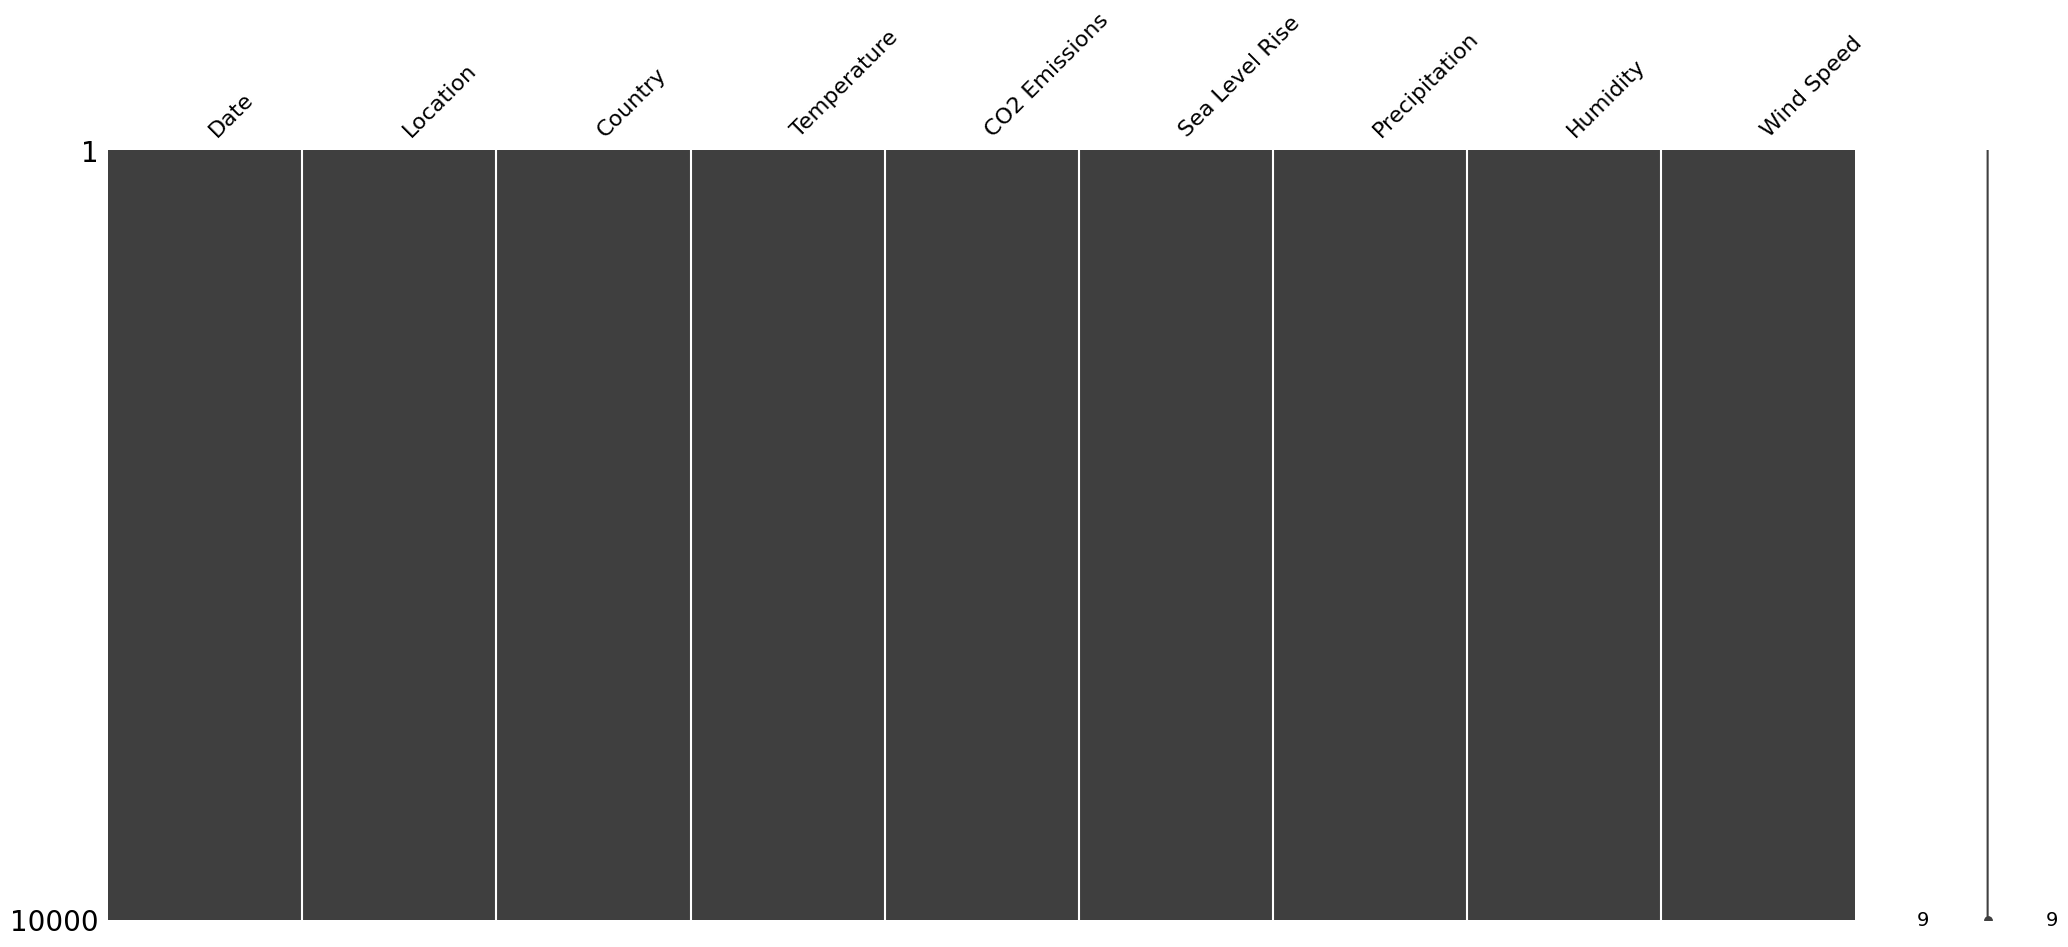

In [4]:
msn.matrix(climate)
#построил матрицу Null значений

In [5]:
climate.shape

(10000, 9)

In [6]:
climate = climate.drop_duplicates()
climate.shape
# дцбликатов не обнаружено

(10000, 9)

In [7]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 781.2+ KB


In [8]:
climate.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

C:\Users\alex1\AppData\Local\Temp\ipykernel_16688\2785568751.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


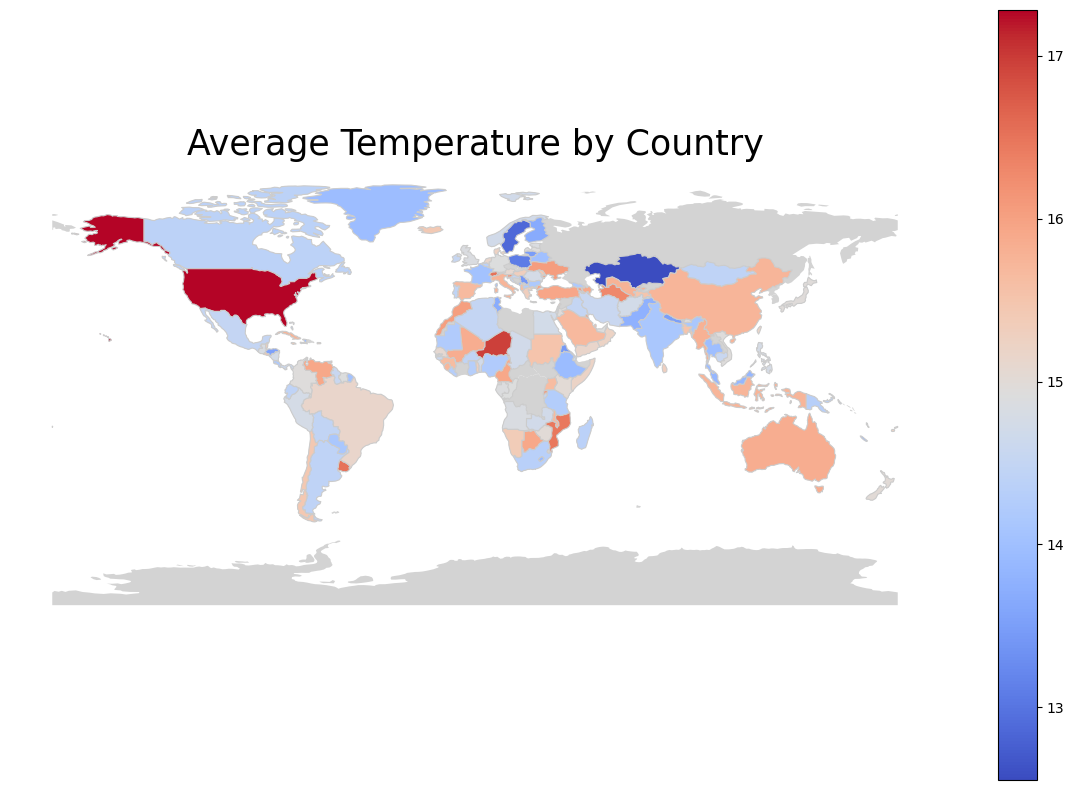

In [9]:
import geopandas as gpd

# Сгруппировать данные по странам и вычислить среднюю температуру
avg_temp_by_country = climate.groupby('Country')['Temperature'].mean().reset_index() 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(avg_temp_by_country, left_on='name', right_on='Country')
fig, ax = plt.subplots(figsize=(15, 10))

# Отрисовка карты
world.plot(ax=ax, color='lightgray')

# Закрашивание стран в зависимости от температуры
merged.plot(ax=ax, column='Temperature', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', legend=True)

# Настройки осей и заголовка
ax.axis('off')
ax.set_title('Average Temperature by Country', fontdict={'fontsize': '25', 'fontweight' : '3'})

plt.show()

C:\Users\alex1\AppData\Local\Temp\ipykernel_16688\1071564231.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


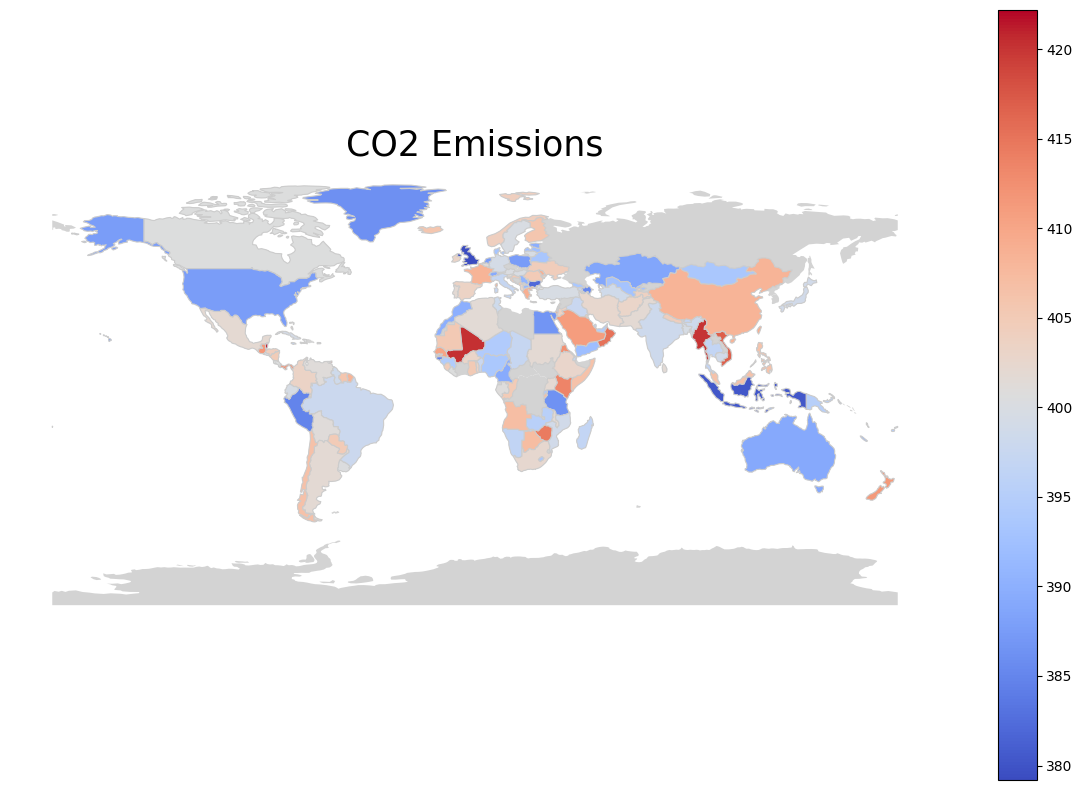

In [10]:
import geopandas as gpd

# Сгруппировать данные по странам и вычислить среднюю температуру
avg_temp_by_country = climate.groupby('Country')['CO2 Emissions'].mean().reset_index() 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(avg_temp_by_country, left_on='name', right_on='Country')
fig, ax = plt.subplots(figsize=(15, 10))

# Отрисовка карты
world.plot(ax=ax, color='lightgray')

# Закрашивание стран в зависимости от температуры
merged.plot(ax=ax, column='CO2 Emissions', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', legend=True)

# Настройки осей и заголовка
ax.axis('off')
ax.set_title('CO2 Emissions', fontdict={'fontsize': '25', 'fontweight' : '3'})

plt.show()

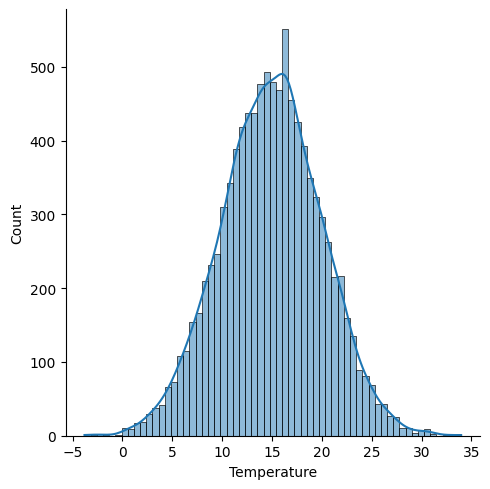

In [11]:
sns.displot(climate['Temperature'], kde = True)

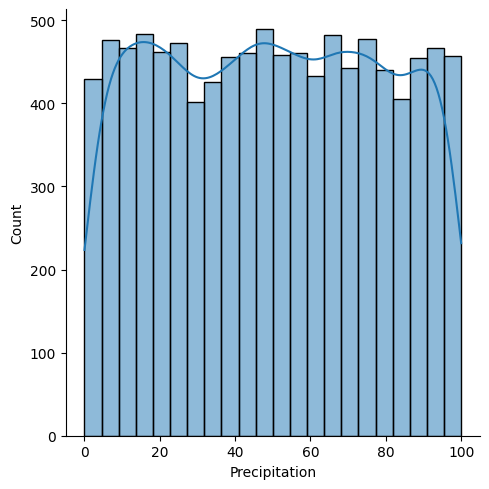

In [12]:
sns.displot(climate['Precipitation'], kde = True)

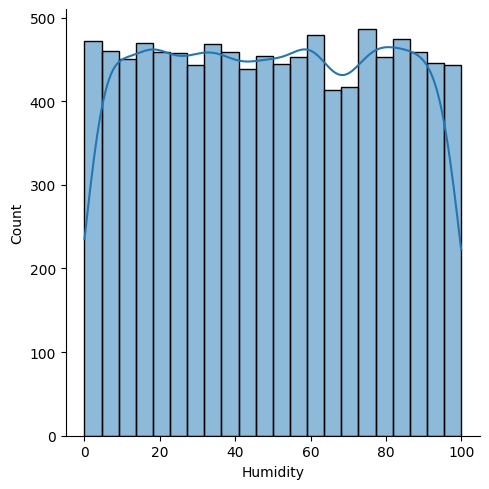

In [13]:
sns.displot(climate['Humidity'], kde = True)

In [14]:
climate.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

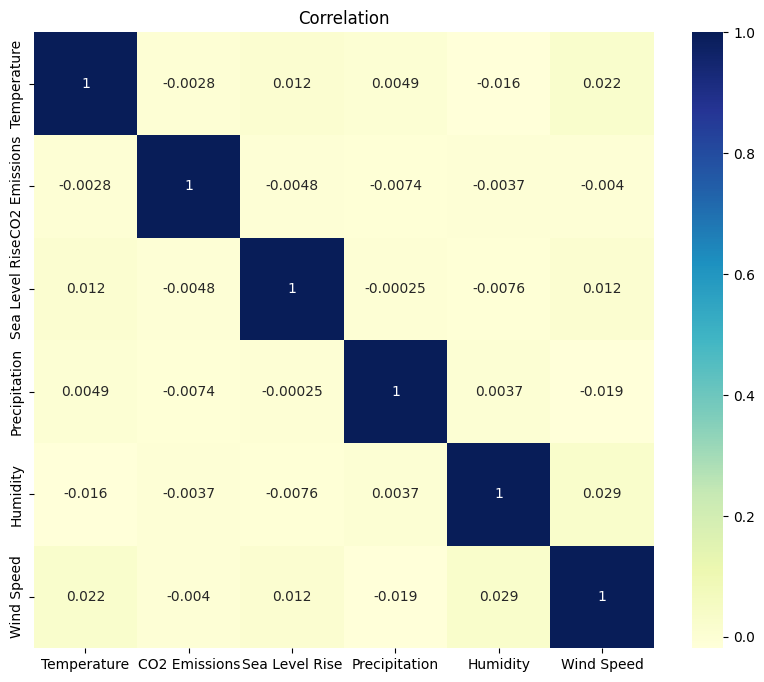

In [15]:

correlation_df =  climate.copy()




# Вычисление корреляционной матрицы
correlation_matrix = correlation_df.corr()

# Создание тепловой карты для визуализации корреляций
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation')
plt.show()

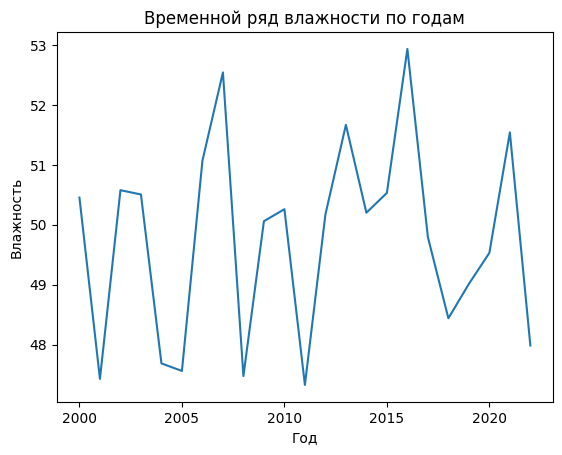

In [16]:


data = climate.copy()
data['Date'] = pd.to_datetime(data['Date'])


data['Year'] = data['Date'].dt.year
humidity_by_year = data.groupby('Year')['Humidity'].mean().reset_index()
plt.plot(humidity_by_year['Year'], humidity_by_year['Humidity'])
plt.xlabel('Год')
plt.ylabel('Влажность')
plt.title('Временной ряд влажности по годам')
plt.show()

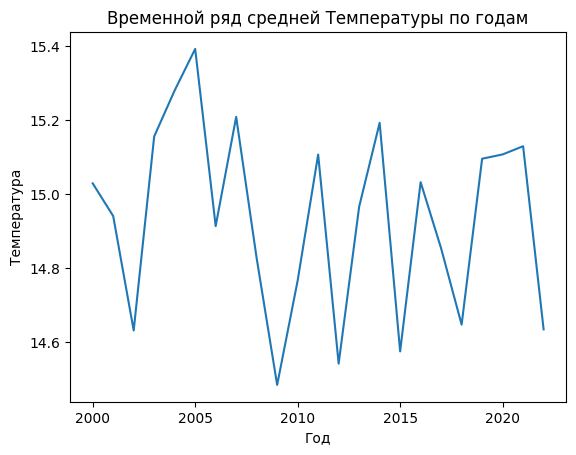

In [17]:

data = climate.copy()
data['Date'] = pd.to_datetime(data['Date'])


data['Year'] = data['Date'].dt.year
humidity_by_year = data.groupby('Year')['Temperature'].mean().reset_index()
plt.plot(humidity_by_year['Year'], humidity_by_year['Temperature'])
plt.xlabel('Год')
plt.ylabel('Температура')
plt.title('Временной ряд средней Температуры по годам')
plt.show()

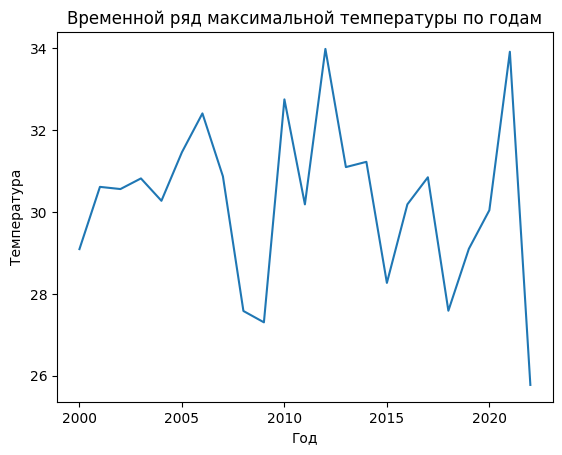

In [18]:
data = climate.copy()
data['Date'] = pd.to_datetime(data['Date'])


data['Year'] = data['Date'].dt.year
humidity_by_year = data.groupby('Year')['Temperature'].max().reset_index()
plt.plot(humidity_by_year['Year'], humidity_by_year['Temperature'])
plt.xlabel('Год')
plt.ylabel('Температура')
plt.title('Временной ряд максимальной температуры по годам')
plt.show()

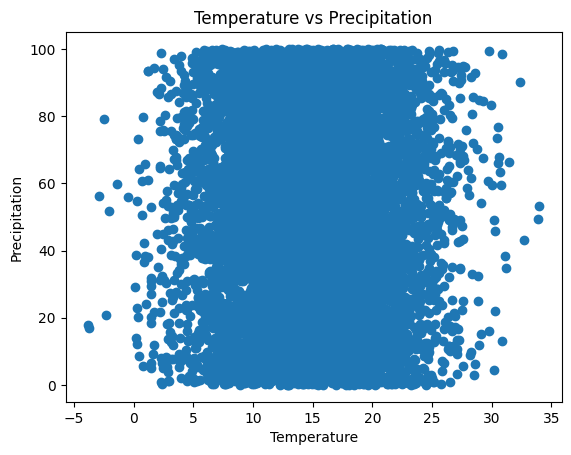

In [19]:
plt.scatter(data['Temperature'], data['Precipitation'])
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('Temperature vs Precipitation')
plt.show()

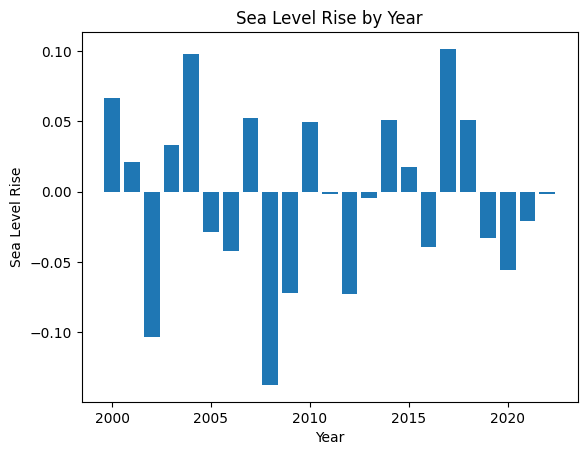

In [20]:
sea_level_rise_by_year = data.groupby('Year')['Sea Level Rise'].mean()
plt.bar(sea_level_rise_by_year.index, sea_level_rise_by_year)
plt.xlabel('Year')
plt.ylabel('Sea Level Rise')
plt.title('Sea Level Rise by Year')
plt.show()


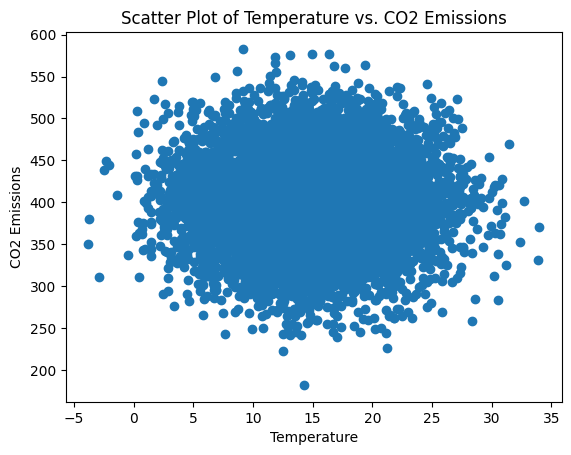

In [21]:
plt.scatter(data['Temperature'], data['CO2 Emissions'])
plt.xlabel('Temperature')
plt.ylabel('CO2 Emissions')
plt.title('Scatter Plot of Temperature vs. CO2 Emissions')
plt.show()